In [1]:
# import data from mat
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import dlib
from pathlib import Path
import glob
from math import cos, sin
import os
from PIL import Image, ImageFilter
import pandas as pd
# from google.colab.patches import cv2_imshow

In [2]:

data = pd.read_csv('D:\ITI\machine learning1\my_project\data.csv',index_col=0)
data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y62,y63,y64,y65,y66,y67,pitch,yaw,roll,image_name
0,121.868034,122.367607,126.819237,130.831787,137.523132,148.521729,161.528015,182.876678,213.940063,248.005371,...,313.233856,315.107117,322.384613,330.965576,330.701965,324.903870,-0.399231,0.018227,0.085676,image00002
1,281.238159,277.339417,274.876953,269.523773,257.788269,240.968155,221.801483,205.846298,207.085449,226.185638,...,300.724457,300.060974,303.260895,299.485168,300.598602,302.286499,0.470065,1.189533,0.300959,image00004
2,236.385101,239.198257,242.566376,243.971375,242.828186,238.567902,232.561859,229.155289,238.303162,259.122467,...,302.877289,302.146454,300.489380,303.481873,304.681732,304.631042,-0.184650,0.881137,-0.236852,image00006
3,168.029221,177.697510,190.641602,201.395294,211.957214,222.723099,231.350220,244.332855,268.327637,291.832214,...,312.701294,310.133301,300.041290,315.544800,319.498596,320.843994,-0.175379,0.299208,-0.373374,image00008
4,280.462250,287.249817,293.892456,297.539368,295.677002,287.270355,271.661591,254.701157,250.219299,261.212463,...,307.014893,305.351318,309.934814,311.558899,312.920746,312.058350,-0.882169,1.198004,-1.033374,image00010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,112.578934,113.787857,119.259262,125.335999,133.637939,146.153839,162.205170,183.907257,213.987427,243.809875,...,317.718140,319.277924,321.063141,324.635498,324.518494,322.085815,-0.197102,-0.070430,0.105118,image04358
1996,111.117966,113.647079,115.328712,120.565918,134.109467,158.448425,187.568314,212.202332,223.977646,218.683380,...,316.013428,315.392395,316.949585,316.981415,317.922302,318.168457,-0.232617,-1.418751,0.175960,image04363
1997,308.227417,309.905334,311.432251,310.488586,303.662415,288.275238,268.575409,248.855255,239.939240,248.186981,...,311.580597,311.960449,316.873444,314.677002,315.051239,313.333374,-1.447955,1.431267,-1.509418,image04364
1998,106.611572,106.089981,107.328842,109.023941,116.216049,136.338547,162.523712,190.193268,208.983047,210.192596,...,310.208862,310.287506,312.933044,313.265747,313.581848,312.269653,-0.420465,-1.191176,0.451515,image04365


In [3]:
#scalling and centering the data

df_copy = data.copy()
for i in range(0 , 2000):
    
#         print(i)
    center_x = data["x32"][i] # x of point32
    center_y = data["y32"][i] # y of points32
    arr_x = np.abs(data["x20"][i] - center_x ) # length of side X  
    arr_y = np.abs(data["y20"][i] - center_y ) # length of side y
    df_copy.iloc[i,:68] = (df_copy.iloc[i,:68] - center_x)/arr_x # applying the scale for x points
    df_copy.iloc[i,68:136] =(df_copy.iloc[i,68:136] - center_y)/arr_y # applying the scale for y points

In [4]:
df_copy.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y62,y63,y64,y65,y66,y67,pitch,yaw,roll,image_name
0,-4.564474,-4.538831,-4.310332,-4.104371,-3.760909,-3.196358,-2.528754,-1.432942,0.161521,1.910070,...,0.326996,0.346856,0.424014,0.514991,0.512196,0.450723,-0.399231,0.018227,0.085676,image00002
1,9.351318,8.901034,8.616633,7.998370,6.642983,4.700351,2.486705,0.643968,0.787083,2.993051,...,0.347350,0.336853,0.387477,0.327744,0.345359,0.372062,0.470065,1.189533,0.300959,image00004
2,1.699737,1.867376,2.068086,2.151811,2.083687,1.829813,1.471907,1.268906,1.814036,3.054679,...,0.303659,0.292817,0.268232,0.312629,0.330430,0.329678,-0.184650,0.881137,-0.236852,image00006
3,-0.978811,-0.794165,-0.546957,-0.341582,-0.139869,0.065739,0.230501,0.478444,0.936699,1.385592,...,0.275214,0.240729,0.105203,0.313399,0.366495,0.384562,-0.175379,0.299208,-0.373374,image00008
4,3.953075,4.276987,4.593984,4.768019,4.679145,4.277968,3.533095,2.723720,2.509839,3.034448,...,0.310180,0.284347,0.355522,0.380742,0.401890,0.388498,-0.882169,1.198004,-1.033374,image00010


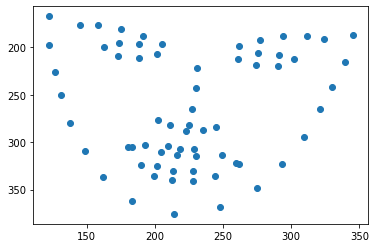

In [5]:
#drawning before scaling
xs = data.iloc[0,:68]
# print(xs[:5])
ys = data.iloc[0,68:136]
# print(ys[:5])
plt.gca().invert_yaxis()
plt.scatter(xs , ys)

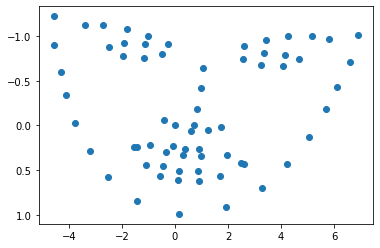

In [6]:
#drawning after scalling 
xs = df_copy.iloc[0,:68]
# print(xs[:5])
ys = df_copy.iloc[0,68:136]
# print(ys[:5])
plt.gca().invert_yaxis()
plt.scatter(xs , ys)

In [7]:
def get_list_from_filenames(file_path):
    # input:    relative path to .txt file with file names
    # output:   list of relative path names
    lines = [Path(f).stem for f in glob.glob(file_path)]
    return lines

In [8]:
def get_ypr_from_mat(mat_path):
    # Get yaw, pitch, roll from .mat annotation.
    # They are in radians
    mat = sio.loadmat(mat_path)
    # [pitch yaw roll tdx tdy tdz scale_factor]
    pre_pose_params = mat['Pose_Para'][0]
    # Get [pitch, yaw, roll]
    pose_params = pre_pose_params[:3]
    return pose_params

In [9]:
def get_pt2d_from_mat(mat_path):
    # Get 2D landmarks
    mat = sio.loadmat(mat_path)
    pt2d = mat['pt2d']
    return pt2d

In [141]:
def getitem(index,mat_path,image_mode='RGB'):
        ## index jpg inamge
        ##mat_path .mat image
        img = Image.open(index)
        img = img.convert(image_mode)
    
        # Crop the face loosely
        pt2d = get_pt2d_from_mat(mat_path)

        x_min = min(pt2d[0,:])
        y_min = min(pt2d[1,:])
        x_max = max(pt2d[0,:])
        y_max = max(pt2d[1,:])

        k = 0.20
        x_min -= 2 * k * abs(x_max - x_min)
        y_min -= 2 * k * abs(y_max - y_min)
        x_max += 2 * k * abs(x_max - x_min)
        y_max += 0.6 * k * abs(y_max - y_min)
        img = img.crop((int(x_min), int(y_min), int(x_max), int(y_max)))

        # We get the pose in radians
        pose = get_ypr_from_mat(mat_path)
        # And convert to degrees.
        pitch = pose[0] * 180 / np.pi
        yaw = pose[1] * 180 / np.pi
        roll = pose[2] * 180 / np.pi
        # Bin values
        bins = np.array(range(-99, 102, 3))
        labels =np.digitize([yaw, pitch, roll], bins) - 1
        cont_labels = [yaw, pitch, roll]

        # if transform is not None:
        #     img = transform(img)

        return img, labels, cont_labels, index

In [142]:
# img ,label,cnlabel,Index=getitem('D:\ITI\machine learning1\project\AFLW2000\image00002.jpg','D:\ITI\machine learning1\project\AFLW2000\image00002.mat')

In [143]:

pitch = df_copy.iloc[0,-4]
yaw = df_copy.iloc[0,-3]
roll = df_copy.iloc[0,-2]

In [144]:
# def draw_axis(img, yaw, pitch, roll, tdx=None, tdy=None, size = 100):

#     pitch = pitch * np.pi / 180
#     yaw = -(yaw * np.pi / 180)
#     roll = roll * np.pi / 180

#     if tdx != None and tdy != None:
#         tdx = tdx
#         tdy = tdy
#     else:
#         height, width = img.shape[:2]
#         tdx = width / 2
#         tdy = height / 2

#     # X-Axis pointing to right. drawn in red
#     x1 = size * (cos(yaw) * cos(roll)) + tdx
#     y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

#     # Y-Axis | drawn in green
#     #        v
#     x2 = size * (-cos(yaw) * sin(roll)) + tdx
#     y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

#     # Z-Axis (out of the screen) drawn in blue
#     x3 = size * (sin(yaw)) + tdx
#     y3 = size * (-cos(yaw) * sin(pitch)) + tdy

#     cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
#     cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
#     cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

#     return img

In [145]:
# image='D:/ITI/machine learning1/project/AFLW2000/image00053.jpg'
# frame = cv2.imread(image)

# cv2_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

# dets = cnn_face_detector(cv2_frame, 1)
# for (idx, det) in enumerate(dets):
#             # Get x_min, y_min, x_max, y_max, conf
#             x_min = det.left()
#             y_min = det.top()
#             x_max = det.right()-x_min
#             y_max = det.bottom()-y_min
#             # conf = det.confidence
#             # print(det)

#             shape = predictor(cv2_frame, det)
#             tdx,tdy=shape.part(30).x, shape.part(30).y
#             bbox_height, bbox_width = frame.shape[:2]
           
#             cv2.destroyAllWindows()

#             a,b=pt3d.shape[0],pt3d.shape[1]
#             for j in range(b):
#                 # print(pt2d[0][j],pt2d[1][j])
#                 cv2.circle(frame, (int(pt3d[0][j]),int(pt3d[1][j])), radius=0, color=(0,0,0), thickness=5)
#                 cv2.putText(frame, str(j), (int(pt3d[0][j]),int(pt3d[1][j])+10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (36,255,12), 2)

#             cv2_imshow(draw_axis(frame,-5.620685,-4.7939262 ,2.5846152
#                                  ,tdx,tdy)
#             )
# cv2.destroyAllWindows()

In [146]:
# draw_axis(img, yaw, pitch, roll, tdx=None, tdy=None, size = 100)

In [13]:
features= df_copy.iloc[:,0:136]
labels= df_copy.iloc[:,-4:-1]
labels

,pitch,yaw,roll
0,-0.399231,0.018227,0.085676
1,0.470065,1.189533,0.300959
2,-0.184650,0.881137,-0.236852
3,-0.175379,0.299208,-0.373374
4,-0.882169,1.198004,-1.033374
...,...,...,...
1995,-0.197102,-0.070430,0.105118
1996,-0.232617,-1.418751,0.175960
1997,-1.447955,1.431267,-1.509418
1998,-0.420465,-1.191176,0.451515


In [70]:
# split the dataframe into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size=0.2, random_state=60)

# split y_train into pitch, yaw, roll
y_train_pitch = y_train['pitch']
print(y_train_pitch.shape)
y_train_yaw = y_train['yaw']
y_train_roll = y_train['roll']



# split y_test into pitch, yaw, roll
y_test_pitch = y_test['pitch']
print(y_test_pitch.shape)
y_test_yaw = y_test['yaw']
y_test_roll = y_test['roll']

(1600,)
(400,)


In [71]:
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

# moldel_pitch = SVR(kernel='rbf', C=1).fit(X_train, y_train_pitch)
# model_yaw = SVR(kernel='sigmoid', C=1e3, gamma=0.1).fit(X_train, y_train_yaw)
# model_roll = SVR(kernel='sigmoid', C=1e3, gamma=0.1).fit(X_train, y_train_roll)


In [138]:
# Import xgboost regression model
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline



# moldel_pitch =  SVR(kernel='linear', C=1e3, gamma=0.1).fit(X_train, y_train_pitch)

# pca = PCA(n_components=3).fit(X_train, y_train_pitch)
moldel_pitch = XGBRegressor(n_estimators=100, learning_rate=0.3, max_depth=4, min_child_weight=1, subsample=1, colsample_bytree=1, nthread=4).fit(X_train, y_train_pitch)

model_yaw = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, min_child_weight=1, gamma=0, subsample=1, colsample_bytree=0.8, nthread=6, seed=100).fit(X_train, y_train_yaw)
model_roll = XGBRegressor(n_estimators=100, learning_rate=0.4,max_depth=4, min_child_weight=1, gamma=0, subsample=1, colsample_bytree=1, nthread=6).fit(X_train, y_train_roll)
# model_roll = XGBRegressor(n_estimators=1000, max_depth=6, eta=0.1,subsample=1, colsample_bytree=1, nthread=6, seed=100).fit(X_train, y_train_roll)

In [139]:
#train model 
y_pred_pitch_train = moldel_pitch.predict(X_train.values)
# print(y_pred_pitch.shape)
y_pred_yaw_train = model_yaw.predict(X_train.values)


y_pred_roll_train = model_roll.predict(X_train.values)


# Test the model



y_pred_pitch = moldel_pitch.predict(X_test.values)
print(y_pred_pitch.shape)

y_pred_yaw = model_yaw.predict(X_test.values)
y_pred_roll = model_roll.predict(X_test.values)

(400,)


In [140]:
# Evaluate the model
print('Pitch:')


print('Mean Squared Error:', mean_squared_error(y_train_pitch, y_pred_pitch_train))
print('R2 Score:', r2_score(y_train_pitch, y_pred_pitch_train))

print('Mean Squared Error:', mean_squared_error(y_test_pitch, y_pred_pitch))
print('R2 Score:', r2_score(y_test_pitch, y_pred_pitch))

# print('Mean Absolute Error:', mean_absolute_error(y_test_pitch, y_pred_pitch))
# print('Explained Variance Score:', explained_variance_score(y_test_pitch, y_pred_pitch))

print("\n Yaw:")
print('Mean Squared Error:', mean_squared_error(y_train_yaw, y_pred_yaw_train))
print('R2 Score:', r2_score(y_train_yaw, y_pred_yaw_train))
print('Mean Squared Error:', mean_squared_error(y_test_yaw, y_pred_yaw))
print('R2 Score:', r2_score(y_test_yaw, y_pred_yaw))
# print('Mean Absolute Error:', mean_absolute_error(y_test_yaw, y_pred_yaw))
# print('Explained Variance Score:', explained_variance_score(y_test_yaw, y_pred_yaw))

print("\n Roll:")
print('Mean Squared Error:', mean_squared_error(y_train_roll, y_pred_roll_train))
print('R2 Score:', r2_score(y_train_roll, y_pred_roll_train))
print('Mean Squared Error:', mean_squared_error(y_test_roll, y_pred_roll))
print('R2 Score:', r2_score(y_test_roll, y_pred_roll))
# print('Mean Absolute Error:', mean_absolute_error(y_test_roll, y_pred_roll))
# print('Explained Variance Score:', explained_variance_score(y_test_roll, y_pred_roll))

Pitch:
Mean Squared Error: 0.00017846715745710437
R2 Score: 0.9996153869177017
Mean Squared Error: 0.008471464247227398
R2 Score: 0.9262092598259771

 Yaw:
Mean Squared Error: 0.000980712826254703
R2 Score: 0.9977642069199788
Mean Squared Error: 0.0025134588839683357
R2 Score: 0.9934490538217009

 Roll:
Mean Squared Error: 4.525357921374805e-05
R2 Score: 0.9999253105107933
Mean Squared Error: 0.007905375005197429
R2 Score: 0.9416170029258031


In [ ]:
#---------------------draw axis --------------------#

In [147]:
# def draw_axis(img, yaw, pitch, roll, tdx=None, tdy=None, size = 100):
    
#     pitch = pitch * np.pi / 180
#     yaw = -(yaw * np.pi / 180)
#     roll = roll * np.pi / 180

#     if tdx != None and tdy != None:
#         tdx = tdx
#         tdy = tdy
#     else:
#         height, width = img.shape[:2]
#         tdx = width / 2
#         tdy = height / 2

#     # X-Axis pointing to right. drawn in red
#     x1 = size * (cos(yaw) * cos(roll)) + tdx
#     y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

#     # Y-Axis | drawn in green
#     #        v
#     x2 = size * (-cos(yaw) * sin(roll)) + tdx
#     y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

#     # Z-Axis (out of the screen) drawn in blue
#     x3 = size * (sin(yaw)) + tdx
#     y3 = size * (-cos(yaw) * sin(pitch)) + tdy

#     cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
#     cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
#     cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

#     return img

In [148]:
#  read_mat function to return pitch, yaw, roll
def read_mat(path):
    # remove the .jpg extension
    path = path.split('.jpg')[0]
    # add the .mat extension
    path = path + '.mat'
    data = sio.loadmat(path)
    landmarks = data['pt3d_68'][:2]
    labels = data['Pose_Para'][0][:3]
    pitch, yaw, roll = labels
    return landmarks, pitch, -yaw, roll

In [149]:
def show_image(path):
    capture = cv2.VideoCapture(path)
    ret, frame = capture.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # convert to RGB format for matplotlib
    
    landmarks, pitch, yaw, roll = read_mat(path)
    print(landmarks.shape)
    nose_x, nose_y = landmarks[0,30], landmarks[1,30]
    
    plt.imshow(draw_axis(frame, yaw, pitch, roll, nose_x, nose_y))
    plt.show()

    capture.release()
    cv2.destroyAllWindows()

(2, 68)


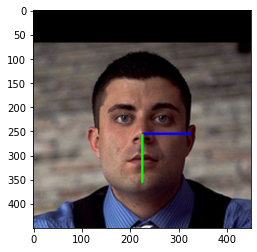

In [150]:
path = 'D:/ITI/machine learning1/project/AFLW2000/image00019.jpg'
show_image(path)

(2, 68)


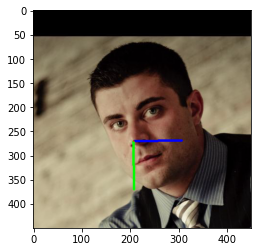

In [151]:
path = 'D:/ITI/machine learning1/project/AFLW2000/image00023.jpg'
show_image(path)

(2, 68)


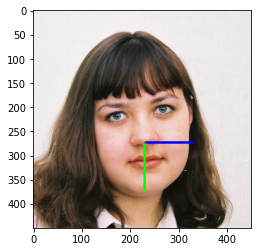

In [152]:
path = 'D:/ITI/machine learning1/project/AFLW2000/image00042.jpg'
show_image(path)

In [ ]:
# predictor=dlib.shape_predictor('D:/ITI/machine learning1/project/AFLW2000/shape_predictor_68_face_landmarks.dat')
# cnn_face_detector = dlib.get_frontal_face_detector()

In [153]:
from imutils import face_utils

In [ ]:
detector = dlib.get_frontal_face_detector()

cap = cv2.VideoCapture(0)
 
while True:
    # Getting out image by webcam 
    _, image = cap.read()
    # Converting the image to gray scale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
    # Get faces into webcam's image
    rects = detector(gray, 0)
    
    # For each detected face, find the landmark.
    for (i, rect) in enumerate(rects):
        # Make the prediction and transfom it to numpy array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
    
        # Draw on our image, all the finded cordinate points (x,y) 
        for (x, y) in shape:
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)
    
    # Show the image
    cv2.imshow("Output", image)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

In [160]:
capture2 = cv2.VideoCapture(0)
while not capture2.isOpened():
    capture2 = cv2.VideoCapture(0)
    cv2.waitKey(1000)
    print("Wait for the camera to open")

ret, frame = capture2.read()
cv2.imwrite('test1.jpg', frame)
capture2.release()
cv2.destroyAllWindows()

In [174]:
def draw_axis(img, yaw, pitch, roll, tdx=None, tdy=None, size = 100):
    
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(255,0,0),5)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),5)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(0,0,255),5)

    return img

*****
[122. 126. 131. 138. 148. 164. 187. 213. 241. 267. 287. 306. 317. 321.
 322. 323. 321. 132. 143. 162. 181. 200. 238. 254. 271. 290. 304. 223.
 226. 228. 231. 212. 222. 233. 242. 250. 155. 167. 182. 196. 183. 167.
 248. 260. 275. 287. 278. 263. 198. 211. 224. 235. 245. 258. 271. 260.
 249. 238. 227. 213. 204. 225. 236. 246. 265. 247. 236. 226. 229. 257.
 284. 310. 334. 355. 370. 380. 380. 373. 357. 337. 312. 283. 255. 226.
 196. 210. 197. 192. 193. 197. 192. 182. 175. 174. 183. 212. 229. 247.
 265. 281. 282. 284. 280. 276. 225. 214. 212. 221. 226. 228. 213. 200.
 198. 205. 212. 213. 315. 307. 301. 304. 300. 302. 307. 318. 324. 327.
 327. 325. 315. 311. 311. 309. 308. 310. 312. 312.] 136 <class 'numpy.ndarray'>
***
[-2.43902439 -2.34146341 -2.2195122  -2.04878049 -1.80487805 -1.41463415
 -0.85365854 -0.2195122   0.46341463  1.09756098  1.58536585  2.04878049
  2.31707317  2.41463415  2.43902439  2.46341463  2.41463415 -2.19512195
 -1.92682927 -1.46341463 -1.         -0.53658537  0.

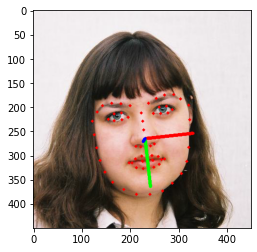

<Figure size 1080x648 with 0 Axes>

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [175]:
cap = cv2.VideoCapture('D:/ITI/machine learning1/project/AFLW2000/image00042.jpg')

hog_face_detector = dlib.get_frontal_face_detector()

dlib_facelandmark = dlib.shape_predictor("D:/ITI/machine learning1/project/AFLW2000/shape_predictor_68_face_landmarks.dat")
pointx = []
pointy = []

# def show_image(path):
#     capture = cv2.VideoCapture(path)
#     ret, frame = capture.read()
#     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # convert to RGB format for matplotlib
    
#     landmarks, pitch, yaw, roll = read_mat(path)
#     print(landmarks.shape)
#     nose_x, nose_y = landmarks[0,30], landmarks[1,30]
    
#     plt.imshow(draw_axis(frame, yaw, pitch, roll, nose_x, nose_y))
#     plt.show()

#     capture.release()
#     cv2.destroyAllWindows()
while True:
    _, frame = cap.read()
    # _, image = cap.read()
    
    # cv2_frame = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray =cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = hog_face_detector(gray)
    for face in faces:

        face_landmarks = dlib_facelandmark(gray, face)
#         print(face_landmarks)

        for n in range(0, 68):
            x = face_landmarks.part(n).x
            pointx.append(float(x))
            y = face_landmarks.part(n).y
            pointy.append(float(y))
            cv2.circle(frame, (x, y), 1, (0, 0, 255), 3)
#             print("X , y : " , f" ({x} ,{y})" , f"------> {n}")
            if n == 67:
                print("*****")
# #     print()
# #     print(pointx)
# #     print(len(pointx))
# #     print("**")
# #     print(pointy)
# #     print("**")
    points = np.array(pointx + pointy)
    print(points , len(points) , type(points))
    print("***")
# #     print(points)
# #     print("**")
# #     print(data.iloc[0,:])
# #     print("**")
    arx = np.abs(points[20] - points[32]) 
# #     print(arx)
    ary = np.abs(points[88] - points[100])
# #     print(ary)
    points[:68] = (points[:68] - points[32])/arx
# #     print(points)
    points[68:136] = (points[68:136] - points[100])/ary
    print(points , len(points))
#     print("**")
# #     print(df_copy.iloc[0,32] , points[32])
# #     print(df_copy.iloc[0,100] , points[100])
# #     print(points)
#     print("**")
#     print(df_copy.iloc[0,:])


#     cv2.imshow("Face Landmarks", frame)
    nose_x, nose_y = pointx[30] , pointy[30]
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    roll = model_roll.predict(points.reshape(1,-1))[0]
    yaw = model_yaw.predict(points.reshape(1,-1))[0]
    pitch = moldel_pitch.predict(points.reshape(1,-1))[0]
      
#     plt.imshow(draw_axis(frame, -1*0.018227,-0.399231,0.085676, nose_x, nose_y))
    plt.imshow(draw_axis(frame,yaw , pitch, roll, nose_x, nose_y))


    plt.figure(figsize=(15, 9))

    plt.show()


    key = cv2.waitKey(5)
    if key == 27:
        break
cap.release()
cv2.destroyAllWindows()

*************


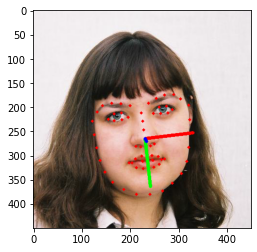

<Figure size 3600x2880 with 0 Axes>

*************


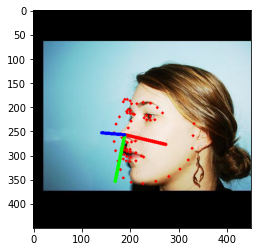

<Figure size 3600x2880 with 0 Axes>

*************


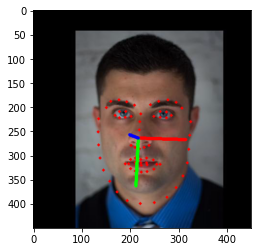

<Figure size 3600x2880 with 0 Axes>

*************


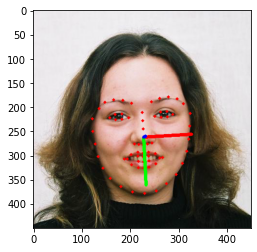

<Figure size 3600x2880 with 0 Axes>

*************


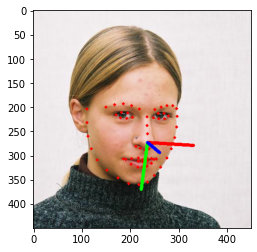

<Figure size 3600x2880 with 0 Axes>

*************


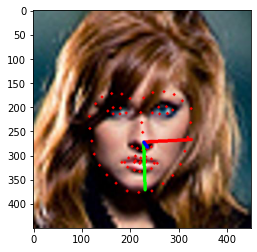

<Figure size 3600x2880 with 0 Axes>

*************


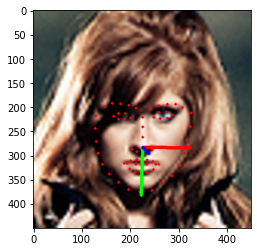

<Figure size 3600x2880 with 0 Axes>

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [176]:
cap1 = cv2.VideoCapture("D:/ITI/machine learning1/project/AFLW2000/image00042.jpg")
cap2 = cv2.VideoCapture("D:/ITI/machine learning1/project/AFLW2000/image00022.jpg")
cap3 = cv2.VideoCapture("D:/ITI/machine learning1/project/AFLW2000/image00028.jpg")
cap4 = cv2.VideoCapture("D:/ITI/machine learning1/project/AFLW2000/image00044.jpg")
cap5 = cv2.VideoCapture("D:/ITI/machine learning1/project/AFLW2000/image00046.jpg")
cap6 = cv2.VideoCapture("D:/ITI/machine learning1/project/AFLW2000/image01953.jpg")
cap7 = cv2.VideoCapture("D:/ITI/machine learning1/project/AFLW2000/image01958.jpg")
# cap = cv2.VideoCapture(0)
hog_face_detector = dlib.get_frontal_face_detector()

dlib_facelandmark = dlib.shape_predictor("D:/ITI/machine learning1/project/AFLW2000/shape_predictor_68_face_landmarks.dat")
# pointx = []
# pointy = []
caps=[cap1 , cap2 , cap3 , cap4 , cap5 , cap6 , cap7]
while True:
    for cap in caps:
        pointx = []
        pointy = []
    
        _, frame = cap.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        faces = hog_face_detector(gray)
        for face in faces:

            face_landmarks = dlib_facelandmark(gray, face)
    #         print(face_landmarks)

            for n in range(0, 68):
                x = face_landmarks.part(n).x
                pointx.append(float(x))
                y = face_landmarks.part(n).y
                pointy.append(float(y))
                cv2.circle(frame, (x, y), 1, (0, 0, 255), 3)
            #  print("X , y : " , f" ({x} ,{y})" , f"------> {n}")
                if n == 67:
                    print("*************")
    # #     print()
    # #     print(pointx)
    # #     print(len(pointx))
    # #     print("****")
    # #     print(pointy)
    # #     print("****")
        points = np.array(pointx + pointy)
    #     print(points , len(points) , type(points))
    #     print("*****")
    # #     print(points)
    # #     print("****")
    # #     print(data.iloc[0,:])
    # #     print("****")
        arx = np.abs(points[20] - points[32]) 
    # #     print(arx)
        ary = np.abs(points[88] - points[100])
    # #     print(ary)
        points[:68] = (points[:68] - points[32])/arx
    # #     print(points)
        points[68:136] = (points[68:136] - points[100])/ary
 


    #     cv2.imshow("Face Landmarks", frame)
        nose_x, nose_y = pointx[30] , pointy[30]
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        roll =model_roll.predict(points.reshape(1,-1))[0]
        yaw = model_yaw.predict(points.reshape(1,-1))[0]
        pitch = moldel_pitch.predict(points.reshape(1,-1))[0]

    #     plt.imshow(draw_axis(frame, -1*0.018227,-0.399231,0.085676, nose_x, nose_y))
        plt.imshow(draw_axis(frame, -1*yaw , pitch, roll, nose_x, nose_y))


        plt.figure(figsize=(50, 40))

        plt.show()


        key = cv2.waitKey(5)
        if key == 27:
            break
cap.release()
cv2.destroyAllWindows()

*************
[-5.36363636 -5.36363636 -5.18181818 -4.90909091 -4.45454545 -3.63636364
 -2.45454545 -1.          0.63636364  2.09090909  3.54545455  4.81818182
  5.72727273  6.18181818  6.45454545  6.54545455  6.72727273 -4.09090909
 -3.36363636 -2.18181818 -1.          0.          1.72727273  2.72727273
  3.90909091  4.90909091  5.54545455  0.72727273  0.63636364  0.63636364
  0.54545455 -0.54545455  0.          0.54545455  1.18181818  1.72727273
 -3.         -2.36363636 -1.54545455 -0.72727273 -1.54545455 -2.36363636
  2.09090909  2.81818182  3.63636364  4.27272727  3.63636364  2.81818182
 -1.72727273 -0.90909091 -0.09090909  0.54545455  1.09090909  1.90909091
  2.81818182  2.          1.18181818  0.54545455 -0.09090909 -0.90909091
 -1.36363636 -0.09090909  0.54545455  1.09090909  2.45454545  1.18181818
  0.54545455  0.         -0.52238806 -0.26865672 -0.01492537  0.25373134
  0.49253731  0.70149254  0.88059701  0.98507463  1.01492537  0.98507463
  0.89552239  0.74626866  0.53731343 

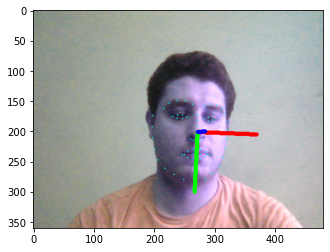

In [178]:

import cv2

cap = cv2.VideoCapture(0)

# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    pointx = []
    pointy = []
    ret, frame = cap.read()
    frame = cv2.resize(frame, None, fx=0.75, fy=0.75, interpolation=cv2.INTER_AREA)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = hog_face_detector(gray)
    for face in faces:

        face_landmarks = dlib_facelandmark(gray, face)
#         print(face_landmarks)

        for n in range(0, 68):
            x = face_landmarks.part(n).x
            pointx.append(float(x))
            y = face_landmarks.part(n).y
            pointy.append(float(y))
            cv2.circle(frame, (x, y), 1, (0, 255, 255), 1)
# #             print("X , y : " , f" ({x} ,{y})" , f"------> {n}")
            if n == 67:
                print("*************")

        points = np.array(pointx + pointy)
        # #
        arx = np.abs(points[20] - points[32]) 
        ary = np.abs(points[88] - points[100])
        points[:68] = (points[:68] - points[32])/arx
        points[68:136] = (points[68:136] - points[100])/ary
        print(points , len(points))



# #     cv2.imshow("Face Landmarks", frame)
        nose_x, nose_y = pointx[30] , pointy[30]
#     #     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        roll = model_roll.predict(points[:136].reshape(1,-1))[0]

        yaw = model_yaw.predict(points[:136].reshape(1,-1))[0]
        pitch = moldel_pitch.predict(points[:136].reshape(1,-1))[0]

# #     plt.imshow(draw_axis(frame, -1*0.018227,-0.399231,0.085676, nose_x, nose_y))
#     
    plt.imshow(draw_axis(frame,-1* yaw , pitch, roll, nose_x, nose_y))

#     cv2.imshow(draw_axis(frame, -1*yaw , pitch, roll, nose_x, nose_y))
    cv2.imshow('Input', frame)

    c = cv2.waitKey(1)
    if c == 27:
        break

cap.release()
cv2.destroyAllWindows()